In [62]:
# 載入需要的套件
import os
import numpy as np 
import pandas as pd
import copy
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# 設定 data_path
dir_data = './data/'
Train = os.path.join(dir_data, 'train.csv')
Test = os.path.join(dir_data, 'test.csv')

# 讀取檔案
Train_data = pd.read_csv(Train)
Test_data = pd.read_csv(Test)

In [64]:
train_Y = np.log1p(Train_data['total_price'])
ids = Test_data['building_id']

tp = copy.deepcopy(np.log1p(Train_data['total_price']))

Train_data = Train_data.drop(['building_id', 'total_price'] , axis=1)
Test_data = Test_data.drop(['building_id'] , axis=1)

df = pd.concat([Train_data,Test_data])
df = df.fillna(df.mean())

train_num = train_Y.shape[0]
train_X = df[:train_num]

df.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,8,21,18674,4,3,2,6271,2,7.133303,50299.900174,...,21,58,1,157,1,2483,1,6011,1,34.469803
1,8,7,18800,5,1,2,7885,2,7.133303,50299.900174,...,7,28,1,115,1,15872,1,32221,1,40.073573
2,8,7,19289,4,1,2,6028,2,7.133303,50299.900174,...,27,78,1,212,1,15760,1,32228,1,54.462081
3,8,21,20385,24,0,2,18325,0,7.133303,81138.889762,...,2,20,1,125,1,2568,1,7271,1,99.628966
4,1,21,20657,2,4,2,6880,2,7.133303,50299.900174,...,2,18,1,47,1,2587,1,7442,1,124.131236


In [65]:
estimator = RandomForestRegressor()
estimator.fit(train_X, train_Y)
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)

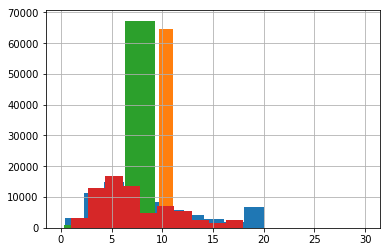

In [66]:
from scipy import stats

df['building_area'] = df['building_area'].clip(0.3, 20)
df['building_area'].hist()

df['parking_price'].replace({np.nan: df['parking_price'].mean()}, inplace = True)
df['parking_price'] = np.log1p(df['parking_price'])
df['parking_price'].hist()

df['parking_area'].replace({np.nan: df['parking_area'].mean()}, inplace = True)
df['parking_area'] = df['parking_area'].clip(0.35, 30)
df['parking_area'].hist()

df['land_area'] = df['land_area'].clip(2.22, 100)
df['land_area'] = stats.boxcox(df['land_area'], lmbda=0.5)
df['land_area'].hist()

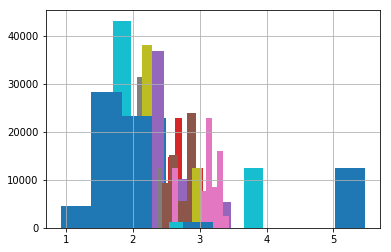

In [67]:
df['divorce_rate'].hist()
df['marriage_rate'] = stats.boxcox(df['marriage_rate'], lmbda=0.25)
df['marriage_rate'].hist()

df['death_rate'] = stats.boxcox(df['death_rate'], lmbda=0.25)
df['death_rate'].hist()

df['born_rate'] = stats.boxcox(df['born_rate'], lmbda=0.25)
df['born_rate'].hist()

df['elementary_rate'] = df['elementary_rate']*20
df['elementary_rate'].hist()

df['junior_rate'] = df['junior_rate']*15
df['junior_rate'].hist()

df['highschool_rate'] = df['highschool_rate']*10
df['highschool_rate'].hist()

df['jobschool_rate'] = df['jobschool_rate']*20
df['jobschool_rate'].hist()

df['bachelor_rate'] = df['bachelor_rate']*10
df['bachelor_rate'].hist()

df['master_rate'] = df['master_rate']*40
df['master_rate'].hist()

df['doc_rate'] = df['doc_rate']*500
df['doc_rate'].hist()

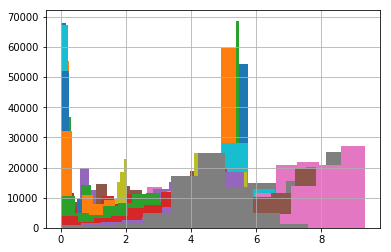

In [68]:
df['N_500'].replace({np.nan: df['N_500'].median()}, inplace = True)
df['N_500'] = df['N_500'] + 1
df['N_500'] = stats.boxcox(df['N_500'], lmbda=0.5)
df['N_500'].hist()

df['N_1000'].replace({np.nan: df['N_1000'].median()}, inplace = True)
df['N_1000'] = stats.boxcox(df['N_1000'], lmbda=0.5)
df['N_1000'].hist()

df['N_5000'].replace({np.nan: df['N_5000'].median()}, inplace = True)
df['N_5000'] = stats.boxcox(df['N_5000'], lmbda=0.5)
df['N_5000'].hist()

df['I_100'] = np.log1p(df['I_100'])
df['I_100'].hist()

df['I_250'] = np.log1p(df['I_250'])
df['I_250'].hist()

df['I_500'] = np.log1p(df['I_500'])
df['I_500'].hist()

df['I_1000'] = np.log1p(df['I_1000'])
df['I_1000'].hist()

df['I_5000'] = np.log1p(df['I_5000'])
df['I_5000'].hist()

df['I_10000'] = np.log1p(df['I_5000'])
df['I_10000'].hist()

df['I_MIN'] = np.log1p(df['I_MIN'])
df['I_MIN'].hist()

df['II_10'] = np.log1p(df['II_10'])
df['II_10'].hist()

df['II_50'] = np.log1p(df['II_50'])
df['II_50'].hist()

df['II_100'] = np.log1p(df['II_100'])
df['II_100'].hist()

df['II_250'] = np.log1p(df['II_250'])
df['II_250'].hist()

df['II_500'] = np.log1p(df['II_500'])
df['II_500'].hist()

df['II_1000'] = np.log1p(df['II_1000'])
df['II_1000'].hist()

df['II_5000'] = np.log1p(df['II_5000'])
df['II_5000'].hist()

df['II_10000'] = np.log1p(df['II_10000'])
df['II_10000'].hist()

df['II_MIN'] = np.log1p(df['II_MIN'])
df['II_MIN'].hist()

df['III_10'] = np.log1p(df['III_10'])
df['III_10'].hist()

df['III_50'] = np.log1p(df['III_50'])
df['III_50'].hist()

df['III_100'] = np.log1p(df['III_100'])
df['III_100'].hist()

df['III_250'] = np.log1p(df['III_250'])
df['III_250'].hist()

df['III_500'] = np.log1p(df['III_500'])
df['III_500'].hist()

df['III_1000'] = np.log1p(df['III_1000'])
df['III_1000'].hist()

df['III_5000'] = np.log1p(df['III_5000'])
df['III_5000'].hist()

df['III_10000'] = np.log1p(df['III_10000'])
df['III_10000'].hist()

df['III_MIN'] = np.log1p(df['III_MIN'])
df['III_MIN'].hist()

In [69]:
# 高重要性特徵，經測試取前37個效果為最佳
high_feature = list(feats[:37].index)
train_X_ = df[:train_num][high_feature]
cross_val_score(estimator, train_X_, train_Y, cv=5).mean()

0.9422631720657586

In [70]:
estimator_ = RandomForestRegressor()
estimator_.fit(train_X_, train_Y)

predict = estimator_.predict(df[train_num:][high_feature])

test_price = np.expm1(predict)

submit = pd.DataFrame(ids)
submit['total_price'] = test_price.astype(np.int32)
submit.to_csv("2019-06-01.csv",index=False)